# IBM Data Challenge 

<img align='left' style="width:100%" src='https://mixiw-c41f.kxcdn.com/wp-content/uploads/2015/08/kickstarter-logo.jpg'>

Kickstarter es una corporación estadounidense de beneficio público con sede en Brooklyn, Nueva York, que mantiene una plataforma global de crowdfunding. La misión declarada de la compañía es "ayudar a dar vida a proyectos creativos". Según los informes, Kickstarter recibió más de $ 1.9 mil millones en promesas de contribuciones de 9.4 millones de patrocinadores para financiar 257,000 proyectos creativos, como películas, música, espectáculos, cómics, periodismo, videojuegos, tecnología y proyectos relacionados con alimentos.

Las personas que respaldan los proyectos de Kickstarter reciben recompensas tangibles o experiencias a cambio de sus donaciones.

# Data

Los datos utilizados en este notebook provienen de un dataset publicado en el sitio web [Kaggle](https://www.kaggle.com/kemical/kickstarter-projects) con datos recolectados de la [plataforma Kickstarter](https://www.kickstarter.com).

Descripcion del dataset

El dataset contiene campañas realizadas en la plataforma de 2009 a 2018. Su estructura se compone de 15 variables que describen más de 370 mil proyectos. 


## Descripción de variables

A continuación se muestra la lista de variables iniciales del dataset. 

**id:** id de la campaña.                             
**nombre:** nombre de la campaña o el producto.                         
**categoria:** categoria específica a la que pertenece (ejemplos)                      
**categoria_principal:** categoría general a la que pertenece.         
**moneda:** moneda del país de origen del creador.                        
**deadline:** fecha límite de la campaña.                       
**meta:** cantidad definida para arrancar el proyecto.                            
**lanzamiento:** fecha de inicio de la campaña.                    
**recaudacion:** cantidad de dinero reunida en la moneda original.                    
**patrocinadores:** el número de personas que hicieron donaciones a la campaña.                 
**pais:** país de origen del creador de la campaña.                           
**dolares_recaudados:** conversión a dólares de la recaudación por la plataforma.             
**dolares_recaudados_reales:** conversión a dólares de la recaudación por la API Fixer.io.     
**meta_dolares_reales:** conversión a dólares de la meta por la API Fixer.io.             
**estado:** estado de la campaña (éxitosa, fracaso, cancelada, activa o suspendida).                         

# Librerías

In [63]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

pd.set_option('display.float_format', lambda x: '%.2f' % x)

# Preprocesamiento de Datos

In [104]:
data = pd.read_csv('https://raw.githubusercontent.com/JaimeSolisS/IBM-Data-Challenge/master/Datasets/ks-projects-201801.csv', encoding= 'latin-1')
data = data.rename(columns={"ID": "id", "name": "nombre", "category":"categoria", "main_category":"categoria_principal",
                   "currency":"moneda","deadline":"deadline","goal":"meta","launched":"lanzamiento","pledged":"recaudacion",
                    "state": "estado", "backers": "patrocinadores", "country": "pais", "usd pledged": "dolares_recaudados", 
                    "usd_pledged_real": "dolares_recaudados_reales", "usd_goal_real": "meta_dolares_reales" })
aux = data.pop('estado')
print("Shape: ",data.shape)
data.info()

Shape:  (378661, 14)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 378661 entries, 0 to 378660
Data columns (total 14 columns):
id                           378661 non-null int64
nombre                       378657 non-null object
categoria                    378661 non-null object
categoria_principal          378661 non-null object
moneda                       378661 non-null object
deadline                     378661 non-null object
meta                         378661 non-null float64
lanzamiento                  378661 non-null object
recaudacion                  378661 non-null float64
patrocinadores               378661 non-null int64
pais                         378661 non-null object
dolares_recaudados           374864 non-null float64
dolares_recaudados_reales    378661 non-null float64
meta_dolares_reales          378661 non-null float64
dtypes: float64(5), int64(2), object(7)
memory usage: 40.4+ MB


In [168]:
data.columns

Index(['nombre', 'categoria', 'categoria_principal', 'deadline', 'lanzamiento',
       'patrocinadores', 'pais', 'recaudacion', 'meta', 'estado'],
      dtype='object')

El dataset original tiene 378661 registros y 14 variables + la **label**(estado). Tiene variables enteras, flotantes y objetos que tendrán que convertirse en númericas más adelante.   

In [162]:
data.head()

,id,nombre,categoria,categoria_principal,moneda,deadline,meta,lanzamiento,recaudacion,patrocinadores,pais,dolares_recaudados,dolares_recaudados_reales,meta_dolares_reales,estado
0,1000002330,The Songs of Adelaide & Abullah,Poetry,Publishing,GBP,09/10/15,1000.00,11/08/15 12:12,0.00,0,GB,0.00,0.00,1533.95,failed
1,1000003930,Greeting From Earth: ZGAC Arts Capsule For ET,Narrative Film,Film & Video,USD,01/11/17,30000.00,02/09/17 4:43,2421.00,15,US,100.00,2421.00,30000.00,failed
2,1000004038,Where is Hank?,Narrative Film,Film & Video,USD,26/02/13,45000.00,12/01/13 0:20,220.00,3,US,220.00,220.00,45000.00,failed
3,1000007540,ToshiCapital Rekordz Needs Help to Complete Album,Music,Music,USD,16/04/12,5000.00,17/03/12 3:24,1.00,1,US,1.00,1.00,5000.00,failed
4,1000011046,Community Film Project: The Art of Neighborhoo...,Film & Video,Film & Video,USD,29/08/15,19500.00,04/07/15 8:35,1283.00,14,US,1283.00,1283.00,19500.00,canceled


De la tabla se pueden concluir varias cosas. Primero, que muchas de las variables deberán convertirse a númericas para que los algoritmos de Machine Learning puedan procesarlas. Además se puede que ver que las variables varian bastante en rangos (patrocinadores y meta, por ejemplo), por lo que debemos convertirlas a la misma escala.

## Limpieza de datos

### Valores nulos

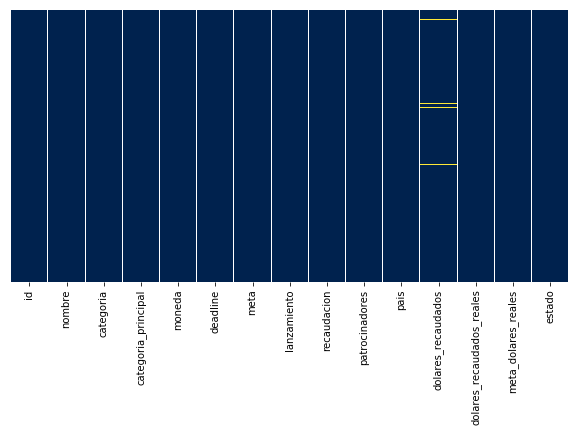

In [163]:
fig, ax = plt.subplots(figsize=(10,5))  
sns.heatmap(data.isnull(),yticklabels=False,cbar=False,cmap='cividis')

La gráfica muestra en color amarillo cuánta información está faltando en cada variable. Tal parece que no es mucha por lo que conviene ver más a detalle cuántos datos nulos tenemos. 


In [144]:
null = data.isnull().sum().sort_values(ascending=True)
percentNull = data.isnull().sum()/data.isnull().count()*100
percentNull = (round(percentNull, 2)).sort_values(ascending=True)
missingData = pd.concat([null, percentNull], axis=1, keys=['Datos nulos', '% Porcentaje'])
missingData.sort_values(by=['Datos nulos'], ascending=False).head()

/Users/jaimesolis/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  after removing the cwd from sys.path.


,Datos nulos,% Porcentaje
dolares_recaudados,3797,1.00
nombre,4,0.00
categoria,0,0.00
categoria_principal,0,0.00
deadline,0,0.00


La variable de dolares_reunidos tiene casi 4000 datos nulos, lo que equivale a un 1%. Debido a que se encontraron incongruencias entre esta variable y dolares reales así como "reunido", no tiene caso trabajar con la primera ya que además de los datos nulos, tiene errores, por lo que es mejor eliminarla. Hay 4 projectos sin nombre, lo cual probablemente sea un error, por lo que se eliminarán los 4 registros. Estas son las únicas dos variables que cuentan con este problema.

In [164]:
data = data.drop(columns=['dolares_recaudados'])
data = data.dropna(how='any',axis=0) 

### Registros Duplicados

In [146]:
duplicates = data[data.duplicated()] 
print("Registros duplicados :")
len(duplicates)

Registros duplicados :


0

El dataset no contiene elementos duplicados. 

### Ruido y Outliers

In [148]:
descriptive = data.describe()
descriptive.transpose()

,count,mean,std,min,25%,50%,75%,max
id,378657.00,1074732169.04,619087231.97,5971.00,538249926.00,1075275666.00,1610148624.00,2147476221.00
patrocinadores,378657.00,105.62,907.19,0.00,2.00,12.00,56.00,219382.00
recaudacion,378657.00,9059.02,90973.82,0.00,31.00,624.38,4050.00,20338986.27
meta,378657.00,45454.25,1152956.11,0.01,2000.00,5500.00,15500.00,166361390.70


Podemos observar que el 50% de los proyectos tienen una meta de 5,500 dólares, sin embargo, la mitad de los proyectos no llegan a recaudar más de 650. De igual manera podemos ver que una cuarta parte de los proyectos buscan juntar más de 15 mil quinientos dólares, y que hay proyectos que buscan más de 100 millones de dólares. Por esta razón es que dejaremos las variables tal como están. 

### Variables innecesarias

In [165]:
data = data.drop(columns=['meta', 'recaudacion'])
data = data.rename(columns={"meta_dolares_reales": "meta", "dolares_recaudados_reales": "recaudacion" })


Para tener un standard de moneda utilizaremos las variables que están convertidas a dólares, por esa razón eliminamos la variable meta y recaudación para renombrar así a las que están convertidas a dólares. 

In [166]:
data = data.drop(columns=['id', 'moneda'])

Ya que la variable id no es útil para un análisis exploratorio ni para la creación del modelo, es descartada. Como la meta y la recaudación está en dólares, tampoco necesitamos la variable "moneda". La variables categoría puede resultar útil para encontrar insights, es muy probable que sea eliminada más adelante del modelo final.

In [180]:
columnas = ['nombre', 'categoria', 'categoria_principal','pais','lanzamiento', 'deadline',
       'patrocinadores','meta','recaudacion','estado']
data = data.reindex(columns=columnas)
data.to_csv('Datasets/kickstarter_clean.csv', index=False)
print("Shape: ",data.shape)
data.head()

Shape:  (378657, 10)


,nombre,categoria,categoria_principal,pais,lanzamiento,deadline,patrocinadores,meta,recaudacion,estado
0,The Songs of Adelaide & Abullah,Poetry,Publishing,GB,11/08/15 12:12,09/10/15,0,1533.95,0.00,failed
1,Greeting From Earth: ZGAC Arts Capsule For ET,Narrative Film,Film & Video,US,02/09/17 4:43,01/11/17,15,30000.00,2421.00,failed
2,Where is Hank?,Narrative Film,Film & Video,US,12/01/13 0:20,26/02/13,3,45000.00,220.00,failed
3,ToshiCapital Rekordz Needs Help to Complete Album,Music,Music,US,17/03/12 3:24,16/04/12,1,5000.00,1.00,failed
4,Community Film Project: The Art of Neighborhoo...,Film & Video,Film & Video,US,04/07/15 8:35,29/08/15,14,19500.00,1283.00,canceled


Podemos concluir que el dataset estaba por lo que no tuvimos que trabajar mucho en él en este sentido. Prácticamente sólo eliminamos variables que no nos son útiles para el projecto.

# Feature Engineering

In [74]:
df = pd.read_csv('https://raw.githubusercontent.com/JaimeSolisS/IBM-Data-Challenge/master/Datasets/kickstarter_clean.csv')
df.head()

,nombre,categoria,categoria_principal,pais,lanzamiento,deadline,patrocinadores,meta,recaudacion,estado
0,The Songs of Adelaide & Abullah,Poetry,Publishing,GB,11/08/15 12:12,09/10/15,0,1533.95,0.00,failed
1,Greeting From Earth: ZGAC Arts Capsule For ET,Narrative Film,Film & Video,US,02/09/17 4:43,01/11/17,15,30000.00,2421.00,failed
2,Where is Hank?,Narrative Film,Film & Video,US,12/01/13 0:20,26/02/13,3,45000.00,220.00,failed
3,ToshiCapital Rekordz Needs Help to Complete Album,Music,Music,US,17/03/12 3:24,16/04/12,1,5000.00,1.00,failed
4,Community Film Project: The Art of Neighborhoo...,Film & Video,Film & Video,US,04/07/15 8:35,29/08/15,14,19500.00,1283.00,canceled


Como mencionamos en la sección anterior, es necesario trabajar algunas variables categóricas para poder utlizarlas en nuestro modelo. 

## Estado

In [183]:
df.estado.value_counts()

failed        197716
successful    133956
canceled       38779
undefined       3562
live            2799
suspended       1845
Name: estado, dtype: int64

Podemos ver que el estado del proyecto puede tener 6 valores:

**Failed:** No llegó a la meta.  
**Successful:** Sí llegó a la meta.  
**Cancelado:** El creador del proyecto canceló la campaña (Será cambiado a "Failed")  
**Undefined:** Indefinido, buscaremos en la plataforma su estado actual.   
**Live:** Activo, buscaremos en la plataforma su estado actual.   
**Suspended:** Kickstarter puede suspender la campaña por diversos motivos, los cuales pueden ser consultados [aquí](https://help.kickstarter.com/hc/en-us/articles/115005139813-Why-would-a-project-be-suspended-). En este caso, eliminaremos los proyectos que tengan este estado.   
 
Los proyectos que tengan estado Undefined o Live serán eliminados del dataset y guardados en otro dataframe "dftest" que será utilizado para realizar el testing del modelo final.

### Reemplazar valores

In [75]:
df.estado=df.estado.replace('canceled', 'failed')
df=df[df.estado!='suspended']
dftest=df[(df.estado=='live') | (df.estado=='undefined')]
dftest = dftest.rename(columns={"estado": "exito"})
df=df[(df.estado!='live') & (df.estado!='undefined')]
df.estado=df.estado.replace('failed' ,0)
df.estado=df.estado.replace('successful', 1)
df.estado.value_counts()

0    236495
1    133956
Name: estado, dtype: int64

### Web Scrapping

In [163]:
from selenium import webdriver
from webdriver_manager.chrome import ChromeDriverManager
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as ec
from selenium.webdriver.common.by import By
from selenium.common.exceptions import NoSuchElementException
from selenium.common.exceptions import TimeoutException

driver = webdriver.Chrome(ChromeDriverManager().install())
driver.get("https://www.kickstarter.com/")

select_currency = driver.find_element_by_xpath('/html/body/div[4]/div/div/div[3]/div/div/div/div/div/section[2]/div/form/select/option[14]').click()
continue_btn = WebDriverWait(driver, 3).until(ec.visibility_of_element_located((By.XPATH, '/html/body/div[4]/div/div/div[3]/div/div/div/div/div/section[2]/div/div/div[2]/div/div/div/div/div/div[2]/button'))).click()

for i in range(97,100):
    search_Btn = WebDriverWait(driver, 3).until(ec.visibility_of_element_located((By.XPATH, '/html/body/div[3]/section/section[3]/button'))).click()
    search_project =driver.find_element_by_xpath('/html/body/div[3]/section/div[1]/div/div/div[1]/input').send_keys(dftest.nombre.iloc[i])
        
    try: 
        enter_project = WebDriverWait(driver, 3).until(ec.visibility_of_element_located((By.XPATH, '/html/body/div[3]/section/div[1]/div/div/div[2]/ul/li[2]/button'))).click()
 
        
        try:
            state = driver.find_element_by_xpath('/html/body/main/div/div/div[1]/div/div/div[5]/div/div[1]/div[1]')
            dftest.exito.iloc[i]= '0'
        except NoSuchElementException:
            dftest.exito.iloc[i]='1'
            
    except TimeoutException:
        driver.refresh()
        
         

[WDM] - Looking for [chromedriver 83.0.4103.39 mac64] driver in cache 
[WDM] - File found in cache by path [/Users/jaimesolis/.wdm/drivers/chromedriver/83.0.4103.39/mac64/chromedriver]
/Users/jaimesolis/opt/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


In [171]:
dftest.head()

,nombre,categoria,categoria_principal,pais,lanzamiento,deadline,patrocinadores,meta,recaudacion,exito
40,Unschooling To University Book Project,Nonfiction,Publishing,CA,20/11/17 18:15,19/01/18,24,2396.36,472.88,1
169,STREETFIGHTERZ WHEELIE MURICA,Film & Video,Film & Video,"N,0""",06/08/14 21:28,20/09/14,0,6500.00,555.00,0
328,Duncan Woods - Chameleon EP,Music,Music,"N,0""",04/08/15 12:05,25/08/15,0,3211.53,3402.08,1
458,The Man in the Field,Horror,Film & Video,GB,21/12/17 11:19,08/01/18,11,1159.38,563.32,1
632,The Making of Ashley Kelley's Debut Album,Music,Music,"N,0""",10/03/15 20:06,09/04/15,0,3500.00,3576.00,1


In [149]:
#dftest.drop(183, inplace=True)
#dftest.drop(537, inplace=True)
#dftest.drop(544, inplace=True)
#dftest.drop(627, inplace=True)
#dftest.drop(783, inplace=True)
#dftest.drop(1603, inplace=True)
#dftest.drop(3338, inplace=True)
#dftest.drop(3374, inplace=True)
#dftest.drop(4948, inplace=True)

Se hizo web scrapping a 100 de las campañas que estaban como Active o undefined en el dataset original para obtener si finalmente fueron un éxito o fracasaron en llegar a la meta. Algunos de los registros no mostraron campañas y por lo tanto fueron eliminados. A continuación, se realizó feature engineering a este dataset para testing. El proceso se explica en la siguiente sección ya que se realizó el mismo procedimiento para el training set como para el test set. 

In [234]:
df100test = dftest.head(100)
df100test.reset_index(drop=True, inplace=True)

In [235]:
import datetime
df100test['deadline']=pd.to_datetime(df100test['deadline'])
df100test['lanzamiento']=pd.to_datetime(df100test['lanzamiento'])
df100test['mes_de_lanzamiento'] = df100test.lanzamiento.dt.month
df100test['año_de_lanzamiento'] = df100test.lanzamiento.dt.year
df100test.lanzamiento = df100test.lanzamiento.dt.date
df100test.deadline = df100test.deadline.dt.date
df100test['duracion_campaña'] = df100test.deadline - df100test.lanzamiento
df100test['duracion_campaña'] = df100test['duracion_campaña'].astype(object)
#df100test['lanzamiento'] = df100test['lanzamiento'].astype(object)
#df100test['deadline'] = df100test['deadline'].astype(object)

df100test.lanzamiento = pd.to_datetime(df100test.lanzamiento)
df100test.deadline=pd.to_datetime(df100test.deadline)

from datetime import datetime, timedelta
from dateutil.relativedelta import relativedelta
import time
from datetime import date, datetime, timedelta
def days_between(d1, d2):
    d1 = datetime.strptime(d1, "%Y-%m-%d %H:%M:%S")
    d2 = datetime.strptime(d2, "%Y-%m-%d %H:%M:%S")
    return abs((d2 - d1).days)
for i in range(0,len(df100test)):
    d=days_between(str(df100test.lanzamiento[i]),str(df100test.deadline[i]))
    df100test.duracion_campaña[i]=d
    
for i in range(0,len(df100test)):
    if df100test.duracion_campaña.iloc[i] < 7: 
        df100test.duracion_campaña.iloc[i] = 30
    
import datetime, time
df100test['primavera']=0
df100test['verano']=0
df100test['otono']=0
df100test['invierno']=0
df100test['temporada']=0
spring = range(80, 172)
summer = range(172, 264)
fall = range(264, 355)
# winter = everything else
for i in range(0,len(df100test)):
    if df100test.lanzamiento[i].timetuple().tm_yday in spring:
        df100test['primavera'][i]=1
        df100test['temporada'][i]='Primavera'
    elif df100test.lanzamiento[i].timetuple().tm_yday in summer:
        df100test['verano'][i]=1
        df100test['temporada'][i]='Verano'  
    elif df100test.lanzamiento[i].timetuple().tm_yday in fall:
        df100test['otono'][i]=1
        df100test['temporada'][i]='Otoño'
    else:
        df100test['invierno'][i]=1
        df100test['temporada'][i]='Invierno'

df100test_IBM = df100test

df100test_IBM = df100test_IBM.drop(columns=['lanzamiento', 'primavera', 'verano', 'otono', 'invierno'])

df100test['mes']=0
for i in range(0,len(df100test)):
    df100test['mes'][i]=df100test['lanzamiento'][i].month
df100test['Mes']=df100test['mes']
df100test=pd.get_dummies(df100test, columns=["mes"])

df100test['Pais']=df100test['pais']
df100test=pd.get_dummies(df100test, columns=['pais'])

df100test['Categoria']=df100test['categoria_principal']
df100test=pd.get_dummies(df100test, columns=['categoria_principal'])

df100test_PY = df100test


/Users/jaimesolis/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/Users/jaimesolis/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/Users/jaimesolis/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataF

In [238]:
df100test_IBM.to_csv('Datasets/test_IBM.csv', index=False)
df100test_PY.to_csv('Datasets/test_PY.csv', index=False)

## Creación de variables

In [77]:
import datetime
df['deadline']=pd.to_datetime(df['deadline'])
df['lanzamiento']=pd.to_datetime(df['lanzamiento'])
df['mes_de_lanzamiento'] = df.lanzamiento.dt.month
df['año_de_lanzamiento'] = df.lanzamiento.dt.year
df.lanzamiento = df.lanzamiento.dt.date
df.deadline = df.deadline.dt.date
df['duracion_campaña'] = df.deadline - df.lanzamiento
df['duracion_campaña'] = df['duracion_campaña'].astype(object)
df['lanzamiento'] = df['lanzamiento'].astype(object)
df['deadline'] = df['deadline'].astype(object)
df.head()

,nombre,categoria,categoria_principal,pais,lanzamiento,deadline,patrocinadores,meta,recaudacion,estado,mes_de_lanzamiento,año_de_lanzamiento,duracion_campaña
0,The Songs of Adelaide & Abullah,Poetry,Publishing,GB,2015-11-08 12:12:00,2015-09-10 00:00:00,0,1533.95,0.00,0,11,2015,-60 days +11:48:00
1,Greeting From Earth: ZGAC Arts Capsule For ET,Narrative Film,Film & Video,US,2017-02-09 04:43:00,2017-01-11 00:00:00,15,30000.00,2421.00,0,2,2017,-30 days +19:17:00
2,Where is Hank?,Narrative Film,Film & Video,US,2013-12-01 00:20:00,2013-02-26 00:00:00,3,45000.00,220.00,0,12,2013,-279 days +23:40:00
3,ToshiCapital Rekordz Needs Help to Complete Album,Music,Music,US,2012-03-17 03:24:00,2012-04-16 00:00:00,1,5000.00,1.00,0,3,2012,29 days 20:36:00
4,Community Film Project: The Art of Neighborhoo...,Film & Video,Film & Video,US,2015-04-07 08:35:00,2015-08-29 00:00:00,14,19500.00,1283.00,0,4,2015,143 days 15:25:00


In [120]:
df[df.lanzamiento > df.deadline].count()

nombre                  89731
categoria               89731
categoria_principal     89731
pais                    89731
lanzamiento             89731
deadline                89731
patrocinadores          89731
meta                    89731
recaudacion             89731
estado                  89731
mes_de_lanzamiento      89731
año_de_lanzamiento      89731
duracion_campaña_mes    89731
dtype: int64

Con las variables de lanzamiento y deadline, se crearon nuevas variables como mes y año de lanzamiento para facilitar un analisis exploratorio y ademas con las dos primeras se calculó la duración de la camapaña. Como se puede observar se tienen duraciones negativas, las cuales se contabilizaron y nos arrojó 89731 proyectos con duraciones negativas. Esto porque el formato del dataset es YYYY-mm-dd, pero los registros que cuentan con este problema fueron recolectados con el formato YYYY-dd-mm por lo que el siguiente bloque de codigo fue implementado para corregir el error. 

In [79]:
df = pd.read_csv('https://raw.githubusercontent.com/JaimeSolisS/IBM-Data-Challenge/master/Datasets/corregir_fechas.csv')
df.lanzamiento = pd.to_datetime(df.lanzamiento)
df.deadline=pd.to_datetime(df.deadline)

from datetime import datetime, timedelta
from dateutil.relativedelta import relativedelta
import time
from datetime import date, datetime, timedelta
def days_between(d1, d2):
    d1 = datetime.strptime(d1, "%Y-%m-%d %H:%M:%S")
    d2 = datetime.strptime(d2, "%Y-%m-%d %H:%M:%S")
    return abs((d2 - d1).days)
for i in range(0,len(df)):
    d=days_between(str(df.lanzamiento[i]),str(df.deadline[i]))
    df.duracion_campaña[i]=d
df.head()

/Users/jaimesolis/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  from ipykernel import kernelapp as app


,nombre,categoria,categoria_principal,pais,lanzamiento,deadline,patrocinadores,meta,recaudacion,estado,mes_de_lanzamiento,año_de_lanzamiento,duracion_campaña
0,The Songs of Adelaide & Abullah,Poetry,Publishing,GB,2015-11-08,2015-09-10,0,1533.95,0.00,0,11,2015,59
1,Greeting From Earth: ZGAC Arts Capsule For ET,Narrative Film,Film & Video,US,2017-02-09,2017-01-11,15,30000.00,2421.00,0,2,2017,29
2,Where is Hank?,Narrative Film,Film & Video,US,2013-12-01,2013-02-26,3,45000.00,220.00,0,12,2013,278
3,ToshiCapital Rekordz Needs Help to Complete Album,Music,Music,US,2012-03-17,2012-04-16,1,5000.00,1.00,0,3,2012,30
4,Community Film Project: The Art of Neighborhoo...,Film & Video,Film & Video,US,2015-04-07,2015-08-29,14,19500.00,1283.00,0,4,2015,144


In [80]:
df.to_csv('Datasets/formato_fecha_corregido.csv', index=False)

In [83]:
df[df.duracion_campaña<0]

,nombre,categoria,categoria_principal,pais,lanzamiento,deadline,patrocinadores,meta,recaudacion,estado,mes_de_lanzamiento,año_de_lanzamiento,duracion_campaña


Ya no hay campañas con duración negativa

In [84]:
import datetime, time
df['primavera']=0
df['verano']=0
df['otono']=0
df['invierno']=0
df['temporada']=0
spring = range(80, 172)
summer = range(172, 264)
fall = range(264, 355)
# winter = everything else
for i in range(0,len(df)):
    if df.lanzamiento[i].timetuple().tm_yday in spring:
        df['primavera'][i]=1
        df['temporada'][i]='Primavera'
    elif df.lanzamiento[i].timetuple().tm_yday in summer:
        df['verano'][i]=1
        df['temporada'][i]='Verano'  
    elif df.lanzamiento[i].timetuple().tm_yday in fall:
        df['otono'][i]=1
        df['temporada'][i]='Otoño'
    else:
        df['invierno'][i]=1
        df['temporada'][i]='Invierno'
df.temporada.value_counts()

/Users/jaimesolis/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/Users/jaimesolis/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/Users/jaimesolis/opt/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
/Use

Verano       96640
Primavera    93417
Otoño        91336
Invierno     89058
Name: temporada, dtype: int64

In [85]:
df.to_csv('Datasets/kickstarter_with_seasons.csv', index=False)

In [168]:
df = pd.read_csv('Datasets/kickstarter_with_seasons.csv')
df['duracion_campaña'] = df['duracion_campaña'].astype(int)
df.lanzamiento = pd.to_datetime(df.lanzamiento)
df_EDA = df
df_EDA.to_csv('Datasets/kickstarter_EDA.csv', index=False)

Adicionalmente, se creó la variable temporada dependiendo de la fecha de inicio de la campaña y como es una variable categórica, se crearon cuatro variables dummy para que puedan ser procesados por los algoritmos de clasificación. Esto tendrá que realizarse de igual manera con el resto de las variables categóricas.  

### One Hot Encoding

In [10]:
df['mes']=0
for i in range(0,len(df)):
    df['mes'][i]=df['lanzamiento'][i].month
df['Mes']=df['mes']
df=pd.get_dummies(df, columns=["mes"])

df['Pais']=df['pais']
df=pd.get_dummies(df, columns=['pais'])

df['Categoria']=df['categoria_principal']
df=pd.get_dummies(df, columns=['categoria_principal'])

/Users/jaimesolis/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


Se hizo One hot encoding con las variables de mes, pais y categoría. 

In [14]:
df.to_csv('Datasets/kickstarter_ML.csv', index=False)

# Análisis Exploratorio

In [169]:
df_EDA.pd.read_csv('Datasets/kickstarter_EDA.csv')
df_EDA = df_EDA.drop(columns=['lanzamiento','deadline','primavera', 'verano', 'otono', 'invierno'])
df_EDA = df_EDA.rename(columns={"estado": "exito"})
df_EDA.head()

,nombre,categoria,categoria_principal,pais,patrocinadores,meta,recaudacion,exito,mes_de_lanzamiento,año_de_lanzamiento,duracion_campaña,temporada
0,The Songs of Adelaide & Abullah,Poetry,Publishing,GB,0,1533.95,0.00,0,11,2015,59,Otoño
1,Greeting From Earth: ZGAC Arts Capsule For ET,Narrative Film,Film & Video,US,15,30000.00,2421.00,0,2,2017,29,Invierno
2,Where is Hank?,Narrative Film,Film & Video,US,3,45000.00,220.00,0,12,2013,278,Otoño
3,ToshiCapital Rekordz Needs Help to Complete Album,Music,Music,US,1,5000.00,1.00,0,3,2012,30,Invierno
4,Community Film Project: The Art of Neighborhoo...,Film & Video,Film & Video,US,14,19500.00,1283.00,0,4,2015,144,Primavera


## Campañas exitosas vs Fracasos

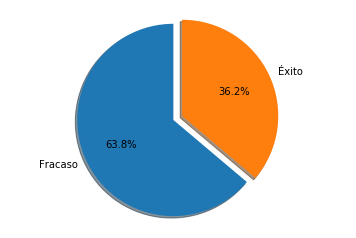

In [101]:
labels ='Fracaso', 'Éxito',
sizes = [len(df_EDA[df_EDA.exito==0]),len(df_EDA[df_EDA.exito==1]),  ]
explode = (0, 0.1,) 

fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')

plt.show()

El 36.2% de las campañas en el dataset están registradas como exitosas. Aunque existe un leve desbalance para la clasificación, no debería representar un problema. 

## I- Importar librerias

In [3]:
#Librerias para limpieza de datos
import numpy as np
import matplotlib.pyplot as plt
import os
from pandas import Series
import pandas as pd
from pandas import DataFrame
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn import preprocessing
import seaborn as sns
from sklearn.datasets.samples_generator import make_blobs
from sklearn.cluster import KMeans
#LIBRERIAS A UTILIZAR
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns
import statsmodels.api as sm
from sklearn import preprocessing
##Importamos librerías necesarias para modelos de clasificación
#la famosa regresion logistica
from sklearn.linear_model import LogisticRegression
#un train y test split para entrenar los algoritmos
from sklearn.model_selection import train_test_split
#metricas para ver la confiabilidad de nuestos modelos
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from mpl_toolkits.mplot3d import Axes3D
from datetime import datetime, date
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import SelectFromModel
#arboles de clasificacion
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn import metrics
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from matplotlib.colors import ListedColormap
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_moons, make_circles, make_classification
#redes neuronales
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
#support vector machines
from sklearn.svm import SVC
#gaussian process (un algoritmo muy lento que se descarto)
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.tree import DecisionTreeClassifier
#etc
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.metrics import classification_report, confusion_matrix
from sklearn import model_selection
#la siguiente librería nos sirve para guardar modelos y correrlos cuando queramos, para cuando encontremos 
#la clasificación perfecta no perderla y usarla siempre todos los días
import pickle
pd.set_option('display.max_columns', 200)
pd.set_option('display.max_rows', 500)
#aqui importamos las ténicas usadas de under sampling, oversampling y combination of both para cambiar el tamaño
#y funcionamiento
from imblearn.under_sampling import (ClusterCentroids, RandomUnderSampler,
                                     NearMiss,
                                     InstanceHardnessThreshold,
                                     CondensedNearestNeighbour,
                                     EditedNearestNeighbours,
                                     RepeatedEditedNearestNeighbours,
                                     AllKNN,
                                     NeighbourhoodCleaningRule,
                                     OneSidedSelection)
from imblearn.pipeline import make_pipeline
from imblearn.over_sampling import (SMOTE, BorderlineSMOTE, SVMSMOTE, SMOTENC,
                                    KMeansSMOTE)

from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import balanced_accuracy_score

from imblearn.datasets import fetch_datasets
from imblearn.ensemble import BalancedBaggingClassifier
from imblearn.ensemble import BalancedRandomForestClassifier
from imblearn.ensemble import EasyEnsembleClassifier
from imblearn.ensemble import RUSBoostClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis
from sklearn.ensemble import AdaBoostClassifier, BaggingClassifier, ExtraTreesClassifier, GradientBoostingClassifier, RandomForestClassifier
from sklearn.linear_model import RidgeClassifier, SGDClassifier
from sklearn.naive_bayes import BernoulliNB, GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.svm import LinearSVC, NuSVC, SVC
from sklearn.tree import DecisionTreeClassifier, ExtraTreeClassifier

C:\Users\e-dvillarrl\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:144: FutureWarning: The sklearn.datasets.samples_generator module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.datasets. Anything that cannot be imported from sklearn.datasets is now part of the private API.
  warnings.warn(message, FutureWarning)
Using TensorFlow backend.


## II- Importar datos y unir datos

In [14]:
cols=[
 'meta',
 'duracion_campaña',
 'primavera',
 'verano',
 'otono',
 'invierno',
 'mes_1',
 'mes_2',
 'mes_3',
 'mes_4',
 'mes_5',
 'mes_6',
 'mes_7',
 'mes_8',
 'mes_9',
 'mes_10',
 'mes_11',
 'mes_12',
 'pais_AT',
 'pais_AU',
 'pais_BE',
 'pais_CA',
 'pais_CH',
 'pais_DE',
 'pais_DK',
 'pais_ES',
 'pais_FR',
 'pais_GB',
 'pais_HK',
 'pais_IE',
 'pais_IT',
 'pais_JP',
 'pais_LU',
 'pais_MX',
 'pais_N,0"',
 'pais_NL',
 'pais_NO',
 'pais_NZ',
 'pais_SE',
 'pais_SG',
 'pais_US',
 'categoria_principal_Art',
 'categoria_principal_Comics',
 'categoria_principal_Crafts',
 'categoria_principal_Dance',
 'categoria_principal_Design',
 'categoria_principal_Fashion',
 'categoria_principal_Film & Video',
 'categoria_principal_Food',
 'categoria_principal_Games',
 'categoria_principal_Journalism',
 'categoria_principal_Music',
 'categoria_principal_Photography',
 'categoria_principal_Publishing',
 'categoria_principal_Technology',
 'categoria_principal_Theater']

In [15]:
###Feature selection, pearson, chi square, random forrest y logistic regression
df.duracion_campaña=df.duracion_campaña.astype('int')
num_feats=15
X=df[cols]
y=df['estado']
def cor_selector(X, y,num_feats):
    cor_list = []
    feature_name = X.columns.tolist()
    # calculate the correlation with y for each feature
    for i in X.columns.tolist():
        cor = np.corrcoef(X[i], y)[0, 1]
        cor_list.append(cor)
    # replace NaN with 0
    cor_list = [0 if np.isnan(i) else i for i in cor_list]
    # feature name
    cor_feature = X.iloc[:,np.argsort(np.abs(cor_list))[-num_feats:]].columns.tolist()
    # feature selection? 0 for not select, 1 for select
    cor_support = [True if i in cor_feature else False for i in feature_name]
    return cor_support, cor_feature
cor_support, cor_feature = cor_selector(X, y,num_feats)
#print(str(len(cor_feature)), 'selected features')
print('Pearson')

cor_feature

X_normChi = MinMaxScaler().fit_transform(X)
chi_selector = SelectKBest(chi2, k=num_feats)
chi_selector.fit(X_normChi, y)
chi_support = chi_selector.get_support()
chi_feature = X.loc[:,chi_support].columns.tolist()
print('chi square')
#print(str(len(chi_feature)), 'selected features')

chi_feature

embeded_rf_selector = SelectFromModel(RandomForestClassifier(n_estimators=100))
embeded_rf_selector.fit(X, y)

embeded_rf_support = embeded_rf_selector.get_support()
embeded_rf_feature = X.loc[:,embeded_rf_support].columns.tolist()
print('Random Forrest')
#print(str(len(embeded_rf_feature)), 'selected features')

#embeded_k_selector = SelectFromModel(SVC(kernel="linear", C=0.025))
#embeded_k_selector.fit(X, y)

#embeded_k_support = embeded_k_selector.get_support()
#embeded_k_feature = X.loc[:,embeded_k_support].columns.tolist()
#embeded_k_feature = embeded_k_feature[0:17]
#print('SVC')
#print(str(len(embeded_k_feature)), 'selected features')

embeded_k1_selector = SelectFromModel(AdaBoostClassifier())
embeded_k1_selector.fit(X, y)

embeded_k1_support = embeded_k1_selector.get_support()
embeded_k1_feature = X.loc[:,embeded_k1_support].columns.tolist()
print('adaboost')
#embeded_k1_feature = embeded_k1_feature[0:17]
#
embeded_k2_selector = SelectFromModel(LinearDiscriminantAnalysis())
embeded_k2_selector.fit(X, y)

embeded_k2_support = embeded_k2_selector.get_support()
embeded_k2_feature = X.loc[:,embeded_k2_support].columns.tolist()
print('linear discriminant')
#embeded_k1_feature = embeded_k1_feature[0:17]
#ExtraTreesClassifier
embeded_k3_selector = SelectFromModel(ExtraTreesClassifier())
embeded_k3_selector.fit(X, y)

embeded_k3_support = embeded_k3_selector.get_support()
embeded_k3_feature = X.loc[:,embeded_k3_support].columns.tolist()
print('extra tree')

#GradientBoostingClassifier
embeded_k4_selector = SelectFromModel(GradientBoostingClassifier())
embeded_k4_selector.fit(X, y)

embeded_k4_support = embeded_k4_selector.get_support()
embeded_k4_feature = X.loc[:,embeded_k4_support].columns.tolist()
print('gradient')

    #BaggingClassifier
embeded_k5_selector = SelectFromModel(RidgeClassifier())
embeded_k5_selector.fit(X, y)

embeded_k5_support = embeded_k5_selector.get_support()
embeded_k5_feature = X.loc[:,embeded_k5_support].columns.tolist()    
print('Ridge')
from sklearn.feature_selection import RFE
s_scaler = preprocessing.StandardScaler()
X_norm = s_scaler.fit_transform(X)
rfe_selector = RFE(estimator=LogisticRegression(), n_features_to_select=num_feats, step=10, verbose=5)
rfe_selector.fit(X_norm, y)
rfe_support = rfe_selector.get_support()
rfe_feature = X.loc[:,rfe_support].columns.tolist()
print('RFE')

s_scaler = preprocessing.StandardScaler()
X_norm = s_scaler.fit_transform(X)

embeded_lr_selector = SelectFromModel(LogisticRegression(penalty="l2"))
embeded_lr_selector.fit(X_norm, y)

embeded_lr_support = embeded_lr_selector.get_support()
#print(embeded_lr_support)
embeded_lr_feature = X.loc[:,embeded_lr_support].columns.tolist()
print('Logistic Regression')

# put all selection together

num_feats=12
feature_selection_df = pd.DataFrame({'Feature': cols,
                                     'Pearson':cor_support, 'Chi-2':chi_support, 'RFE':rfe_support, 'Logistics':embeded_lr_support,
                                    'Random Forest':embeded_rf_support, 
                                     #'SVC linear':embeded_k_support, 
                                     'AdaBoost':embeded_k1_support,'LinearDiscriminant':embeded_k2_support,'ExtraTree':embeded_k3_support,'Rigde':embeded_k4_support})
# count the selected times for each feature
feature_selection_df['Total'] = np.sum(feature_selection_df, axis=1)
# display the top 100
feature_selection_df = feature_selection_df.sort_values(['Total','Feature'] , ascending=False)
feature_selection_df.index = range(1, len(feature_selection_df)+1)
feature_selection_df
###COMO resultado tenemos una tabla que nos indica la importancia de cada variable
#feature_selection_df.to_excel('featureselectiondataframe.xlsx')

Pearson
chi square
Random Forrest
adaboost
linear discriminant
extra tree
gradient


C:\Users\e-dvillarrl\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:148: LinAlgWarning: Ill-conditioned matrix (rcond=2.12023e-18): result may not be accurate.
  overwrite_a=True).T


Ridge
Fitting estimator with 56 features.
Fitting estimator with 46 features.
Fitting estimator with 36 features.
Fitting estimator with 26 features.
Fitting estimator with 16 features.
RFE
Logistic Regression


,Feature,Pearson,Chi-2,RFE,Logistics,Random Forest,AdaBoost,LinearDiscriminant,ExtraTree,Rigde,Total
1,meta,False,False,True,True,True,True,False,True,True,6
2,categoria_principal_Theater,True,True,True,False,False,True,True,False,True,6
3,categoria_principal_Technology,True,True,True,False,False,True,True,False,True,6
4,categoria_principal_Music,True,True,True,False,False,True,True,False,True,6
5,categoria_principal_Food,True,True,True,False,False,True,True,False,True,6
6,categoria_principal_Fashion,True,True,True,False,False,True,True,False,True,6
7,categoria_principal_Dance,True,True,True,False,False,True,True,False,True,6
8,categoria_principal_Crafts,True,True,True,False,False,True,True,False,True,6
9,categoria_principal_Comics,True,True,True,False,False,True,True,False,True,6
10,pais_IT,True,True,True,False,False,True,True,False,False,5


In [84]:
from imblearn.combine import SMOTEENN
X=df1
y=df1['estado']
smote_enn = RandomUnderSampler(1)
X,y = smote_enn.fit_resample(X,y)
print(X.shape)

(267912, 72)


In [56]:
df2=df1
X_train1, X_test1, y_train1, y_test1 = train_test_split(X, y, test_size=0.25)

(267912, 21)


In [41]:
feature_selection_df = pd.DataFrame({'Feature': cols,
                                     'Pearson':cor_support, 'Chi-2':chi_support, 'RFE':rfe_support, 'Logistics':embeded_lr_support,
                                    'Random Forest':embeded_rf_support, 
                                     #'SVC linear':embeded_k_support, 
                                     'AdaBoost':embeded_k1_support,'LinearDiscriminant':embeded_k2_support,'ExtraTree':embeded_k3_support,'Rigde':embeded_k4_support})
# count the selected times for each feature
feature_selection_df['Total'] = np.sum(feature_selection_df, axis=1)
# display the top 100
feature_selection_df = feature_selection_df.sort_values(['Total','Feature'] , ascending=False)
feature_selection_df.index = range(1, len(feature_selection_df)+1)
feature_selection_df
###COMO resultado tenemos una tabla que nos indica la importancia de cada variable
#feature_selection_df.to_excel('featureselectiondataframe.xlsx')

,Feature,Pearson,Chi-2,RFE,Logistics,Random Forest,AdaBoost,LinearDiscriminant,ExtraTree,Rigde,Total
1,meta,False,False,True,True,True,True,False,True,True,6
2,duracion_campaña,False,False,False,False,True,True,False,True,True,4
3,categoria_principal_Theater,True,True,True,False,False,False,True,False,False,4
4,categoria_principal_Technology,True,True,True,False,False,False,True,False,False,4
5,categoria_principal_Music,True,True,False,False,False,False,True,False,True,4
6,categoria_principal_Journalism,False,False,False,False,False,False,True,False,False,1
7,categoria_principal_Food,False,False,False,False,False,False,True,False,False,1
8,categoria_principal_Fashion,False,False,False,False,False,False,True,False,False,1
9,categoria_principal_Dance,False,False,False,False,False,False,True,False,False,1
10,categoria_principal_Crafts,False,False,False,False,False,False,True,False,False,1


0
Logistic Regression
Accuracy: 0.59 - Balanced accuracy: 0.59 - Geometric mean 0.52


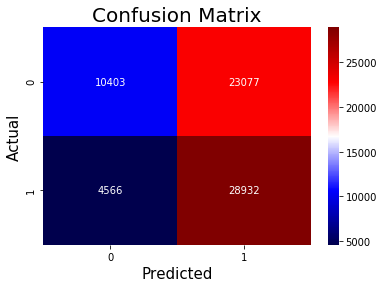

Decision Tree
Accuracy: 0.56 - Balanced accuracy: 0.56 - Geometric mean 0.55


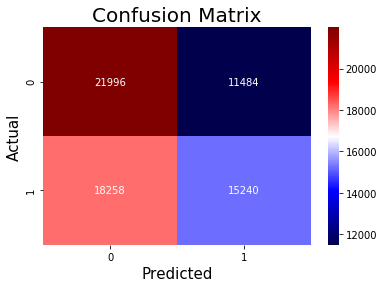

Random Forest
Accuracy: 0.56 - Balanced accuracy: 0.56 - Geometric mean 0.56


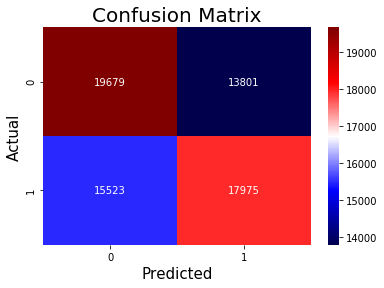

Neural Net
Accuracy: 0.50 - Balanced accuracy: 0.50 - Geometric mean 0.00


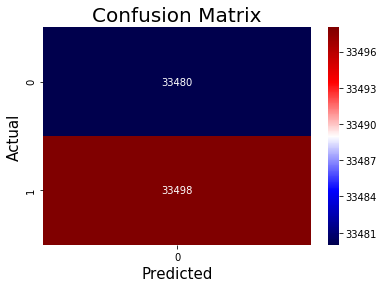

1
Logistic Regression
Accuracy: 0.59 - Balanced accuracy: 0.59 - Geometric mean 0.52


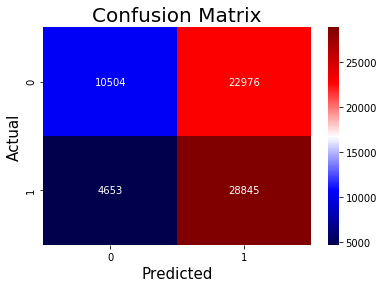

Decision Tree
Accuracy: 0.52 - Balanced accuracy: 0.52 - Geometric mean 0.52


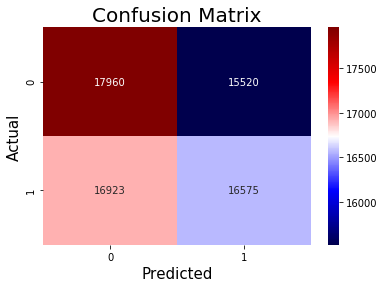

Random Forest
Accuracy: 0.54 - Balanced accuracy: 0.54 - Geometric mean 0.53


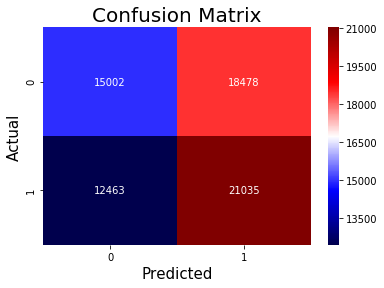

Neural Net
Accuracy: 0.53 - Balanced accuracy: 0.53 - Geometric mean 0.47


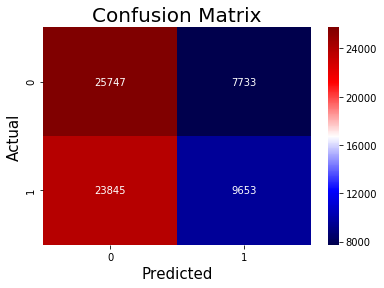

2
Logistic Regression
Accuracy: 0.59 - Balanced accuracy: 0.59 - Geometric mean 0.54


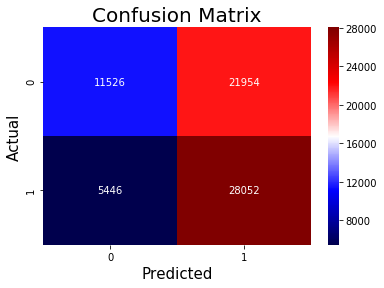

Decision Tree
Accuracy: 0.52 - Balanced accuracy: 0.52 - Geometric mean 0.52


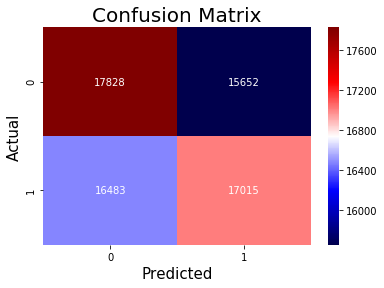

Random Forest
Accuracy: 0.54 - Balanced accuracy: 0.54 - Geometric mean 0.54


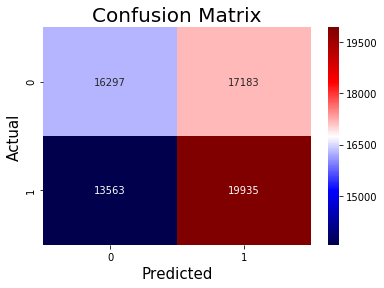

Neural Net
Accuracy: 0.53 - Balanced accuracy: 0.53 - Geometric mean 0.39


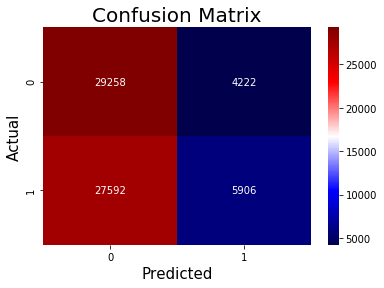

3
Logistic Regression
Accuracy: 0.59 - Balanced accuracy: 0.59 - Geometric mean 0.54


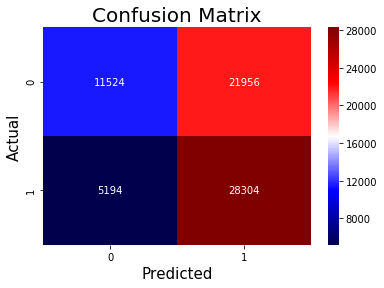

Decision Tree
Accuracy: 0.52 - Balanced accuracy: 0.52 - Geometric mean 0.52


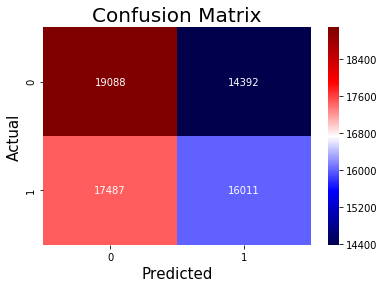

Random Forest
Accuracy: 0.55 - Balanced accuracy: 0.55 - Geometric mean 0.54


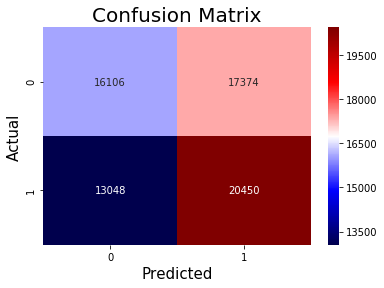

Neural Net
Accuracy: 0.54 - Balanced accuracy: 0.54 - Geometric mean 0.36


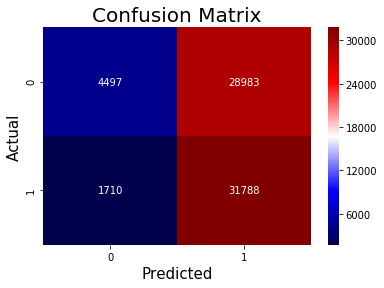

4
Logistic Regression
Accuracy: 0.60 - Balanced accuracy: 0.60 - Geometric mean 0.57


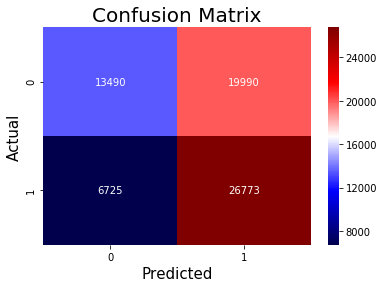

Decision Tree
Accuracy: 0.53 - Balanced accuracy: 0.53 - Geometric mean 0.53


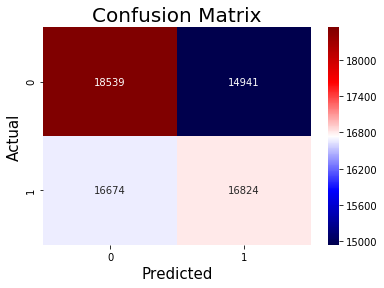

Random Forest
Accuracy: 0.55 - Balanced accuracy: 0.55 - Geometric mean 0.55


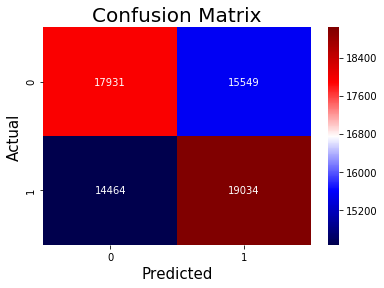

Neural Net
Accuracy: 0.55 - Balanced accuracy: 0.55 - Geometric mean 0.49


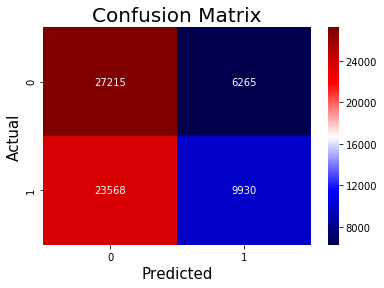

5
Logistic Regression
Accuracy: 0.60 - Balanced accuracy: 0.60 - Geometric mean 0.57


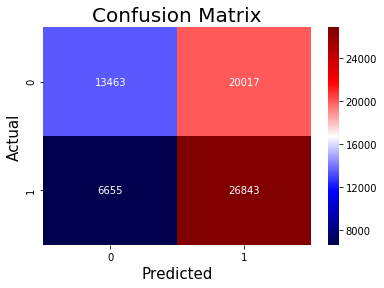

Decision Tree
Accuracy: 0.53 - Balanced accuracy: 0.53 - Geometric mean 0.53


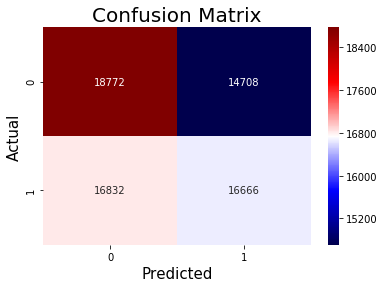

Random Forest
Accuracy: 0.55 - Balanced accuracy: 0.55 - Geometric mean 0.54


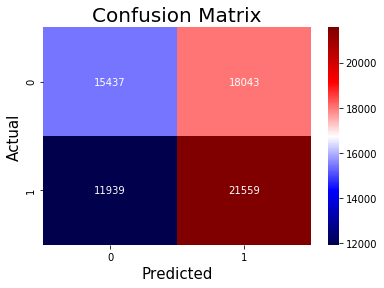

Neural Net
Accuracy: 0.57 - Balanced accuracy: 0.57 - Geometric mean 0.55


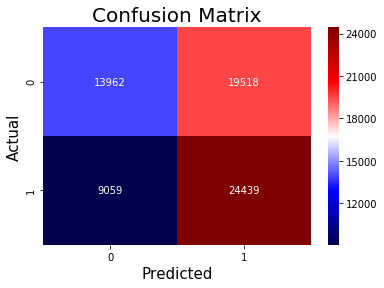

6
Logistic Regression
Accuracy: 0.60 - Balanced accuracy: 0.60 - Geometric mean 0.58


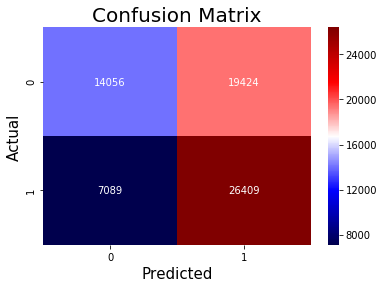

Decision Tree
Accuracy: 0.53 - Balanced accuracy: 0.53 - Geometric mean 0.53


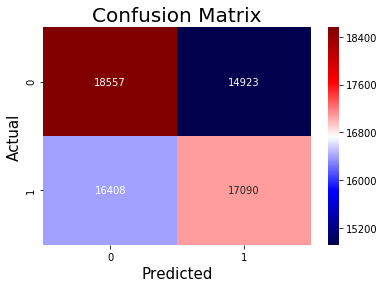

Random Forest
Accuracy: 0.56 - Balanced accuracy: 0.56 - Geometric mean 0.55


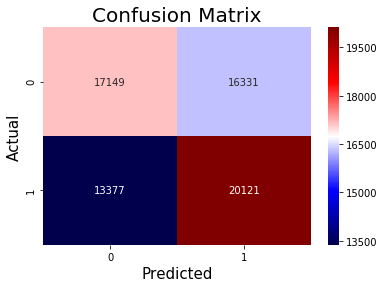

Neural Net
Accuracy: 0.56 - Balanced accuracy: 0.56 - Geometric mean 0.55


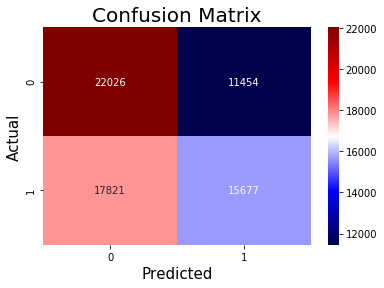

7
Logistic Regression
Accuracy: 0.61 - Balanced accuracy: 0.61 - Geometric mean 0.58


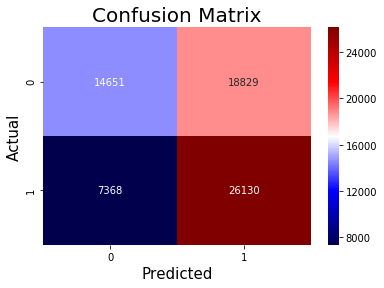

Decision Tree
Accuracy: 0.53 - Balanced accuracy: 0.53 - Geometric mean 0.53


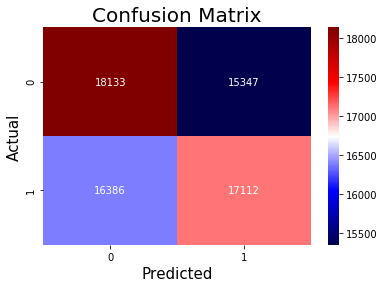

Random Forest
Accuracy: 0.56 - Balanced accuracy: 0.56 - Geometric mean 0.55


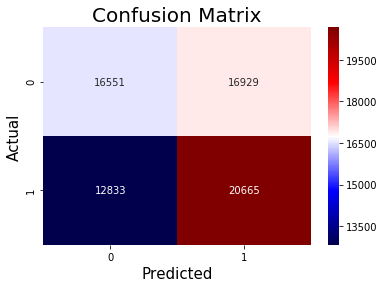

Neural Net
Accuracy: 0.58 - Balanced accuracy: 0.58 - Geometric mean 0.51


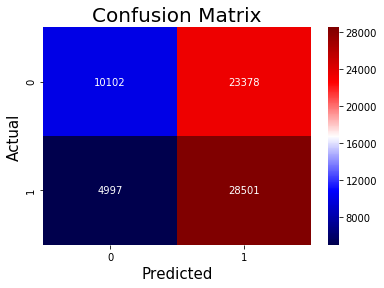

8
Logistic Regression
Accuracy: 0.61 - Balanced accuracy: 0.61 - Geometric mean 0.59


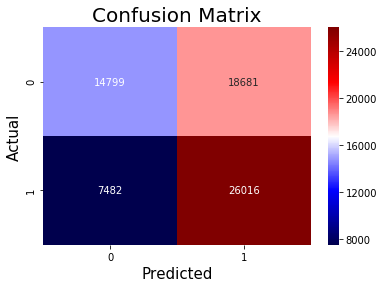

Decision Tree
Accuracy: 0.53 - Balanced accuracy: 0.53 - Geometric mean 0.53


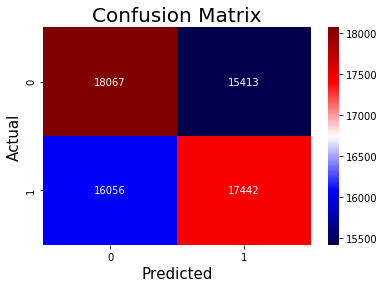

Random Forest
Accuracy: 0.56 - Balanced accuracy: 0.56 - Geometric mean 0.55


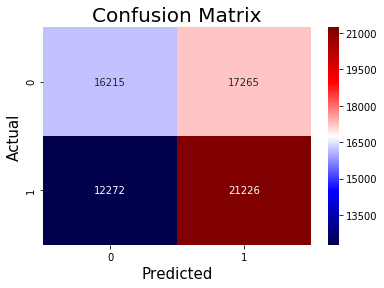

Neural Net
Accuracy: 0.58 - Balanced accuracy: 0.58 - Geometric mean 0.52


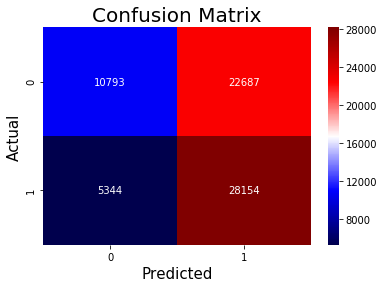

9
Logistic Regression
Accuracy: 0.61 - Balanced accuracy: 0.61 - Geometric mean 0.59


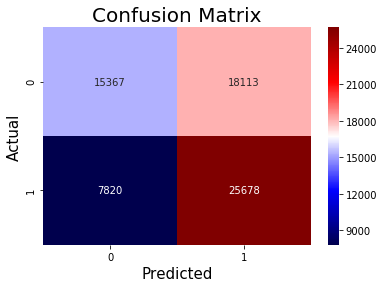

Decision Tree
Accuracy: 0.53 - Balanced accuracy: 0.53 - Geometric mean 0.53


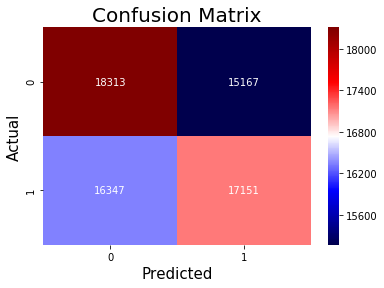

Random Forest
Accuracy: 0.57 - Balanced accuracy: 0.57 - Geometric mean 0.56


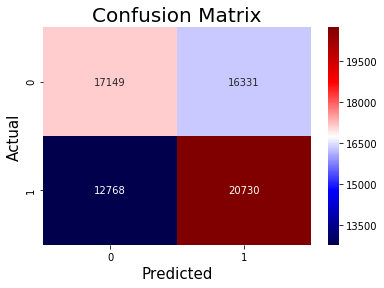

Neural Net
Accuracy: 0.58 - Balanced accuracy: 0.58 - Geometric mean 0.52


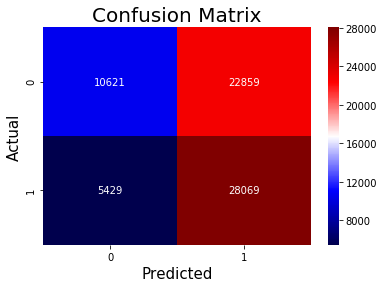

10
Logistic Regression
Accuracy: 0.61 - Balanced accuracy: 0.61 - Geometric mean 0.60


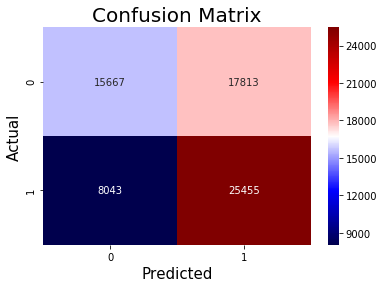

Decision Tree
Accuracy: 0.53 - Balanced accuracy: 0.53 - Geometric mean 0.53


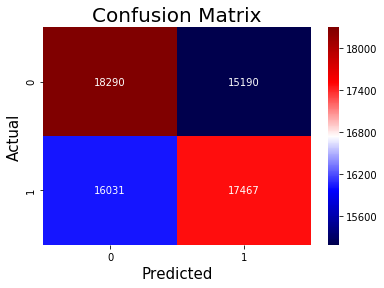

Random Forest
Accuracy: 0.56 - Balanced accuracy: 0.56 - Geometric mean 0.56


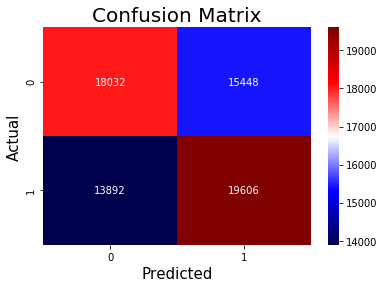

Neural Net
Accuracy: 0.59 - Balanced accuracy: 0.59 - Geometric mean 0.56


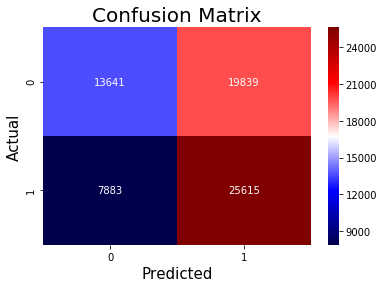

11
Logistic Regression
Accuracy: 0.61 - Balanced accuracy: 0.61 - Geometric mean 0.60


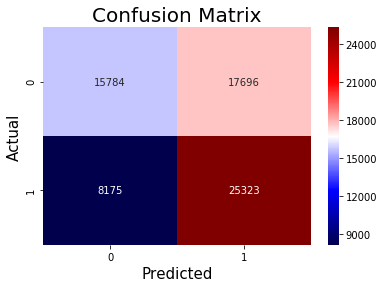

Decision Tree
Accuracy: 0.54 - Balanced accuracy: 0.54 - Geometric mean 0.54


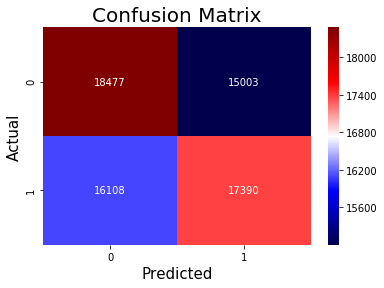

Random Forest
Accuracy: 0.57 - Balanced accuracy: 0.57 - Geometric mean 0.57


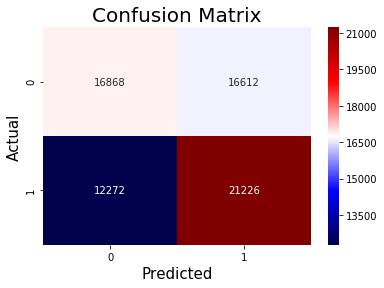

Neural Net
Accuracy: 0.58 - Balanced accuracy: 0.58 - Geometric mean 0.57


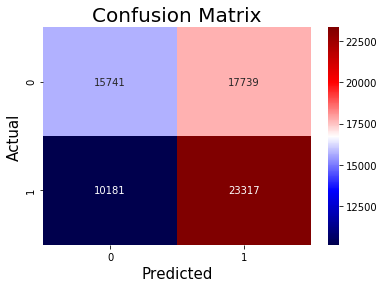

12
Logistic Regression
Accuracy: 0.61 - Balanced accuracy: 0.61 - Geometric mean 0.60


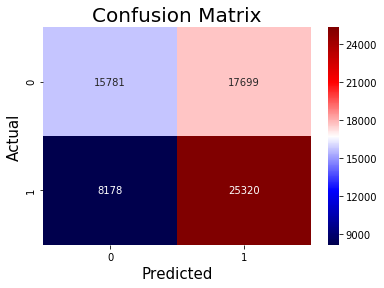

Decision Tree
Accuracy: 0.53 - Balanced accuracy: 0.53 - Geometric mean 0.53


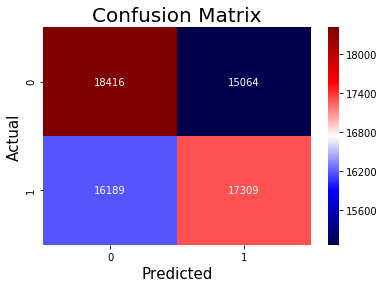

Random Forest
Accuracy: 0.57 - Balanced accuracy: 0.57 - Geometric mean 0.56


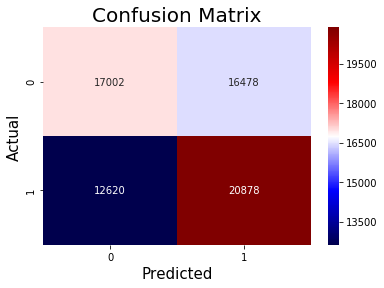

Neural Net
Accuracy: 0.58 - Balanced accuracy: 0.58 - Geometric mean 0.56


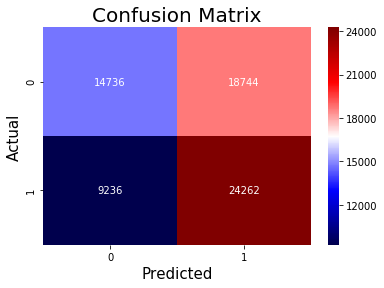

13
Logistic Regression
Accuracy: 0.61 - Balanced accuracy: 0.61 - Geometric mean 0.60


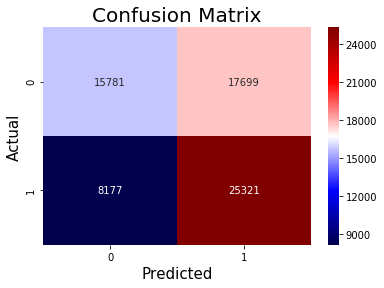

Decision Tree
Accuracy: 0.54 - Balanced accuracy: 0.54 - Geometric mean 0.54


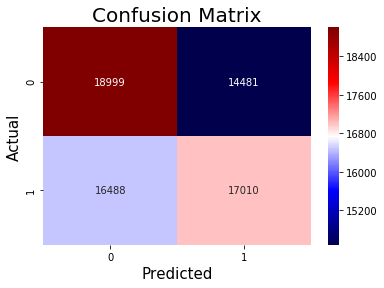

Random Forest
Accuracy: 0.57 - Balanced accuracy: 0.57 - Geometric mean 0.56


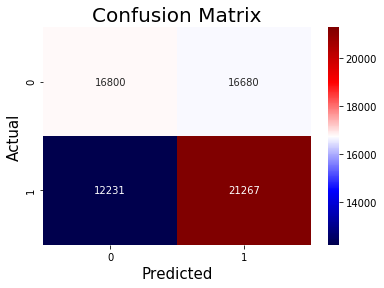

Neural Net
Accuracy: 0.59 - Balanced accuracy: 0.59 - Geometric mean 0.58


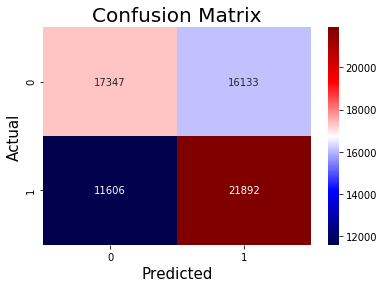

14
Logistic Regression
Accuracy: 0.61 - Balanced accuracy: 0.61 - Geometric mean 0.60


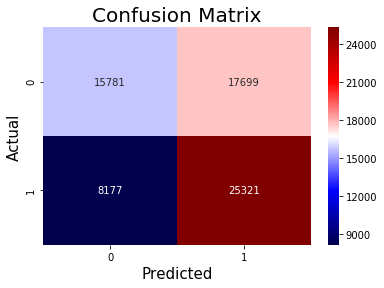

Decision Tree
Accuracy: 0.54 - Balanced accuracy: 0.54 - Geometric mean 0.53


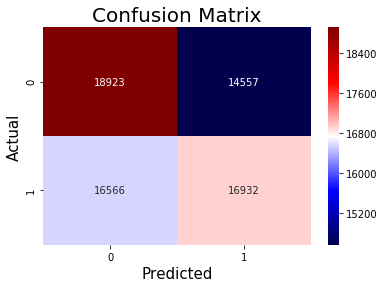

Random Forest
Accuracy: 0.57 - Balanced accuracy: 0.57 - Geometric mean 0.57


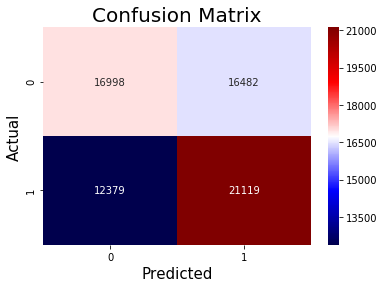

Neural Net
Accuracy: 0.58 - Balanced accuracy: 0.58 - Geometric mean 0.58


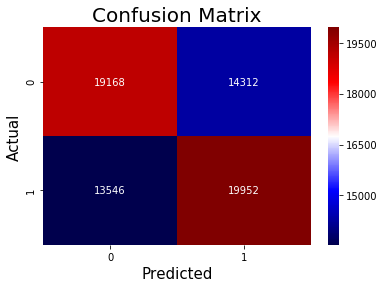

15
Logistic Regression
Accuracy: 0.61 - Balanced accuracy: 0.61 - Geometric mean 0.61


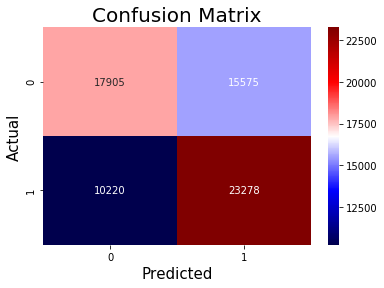

Decision Tree
Accuracy: 0.53 - Balanced accuracy: 0.53 - Geometric mean 0.53


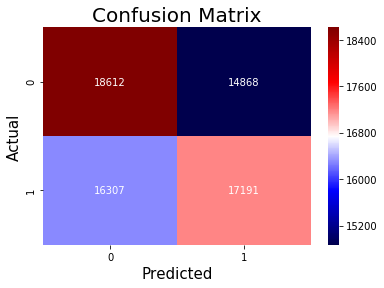

Random Forest
Accuracy: 0.57 - Balanced accuracy: 0.57 - Geometric mean 0.57


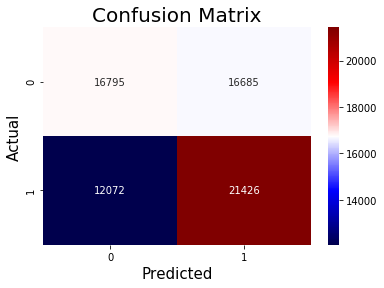

Neural Net
Accuracy: 0.59 - Balanced accuracy: 0.59 - Geometric mean 0.58


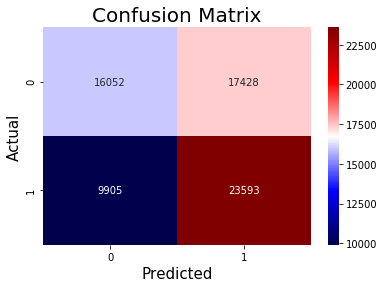

16
Logistic Regression
Accuracy: 0.62 - Balanced accuracy: 0.62 - Geometric mean 0.61


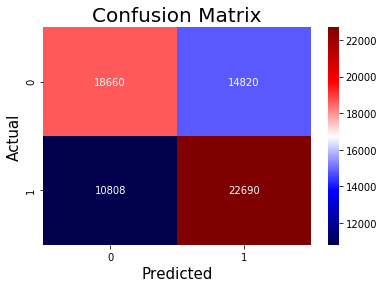

Decision Tree
Accuracy: 0.53 - Balanced accuracy: 0.53 - Geometric mean 0.53


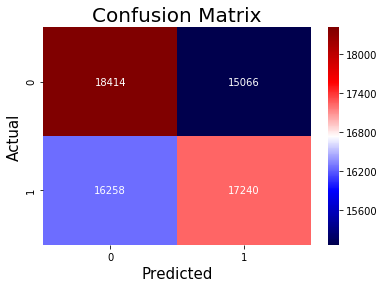

Random Forest
Accuracy: 0.57 - Balanced accuracy: 0.57 - Geometric mean 0.57


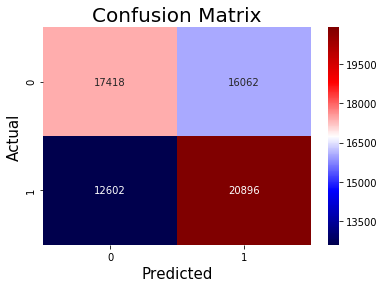

Neural Net
Accuracy: 0.59 - Balanced accuracy: 0.59 - Geometric mean 0.58


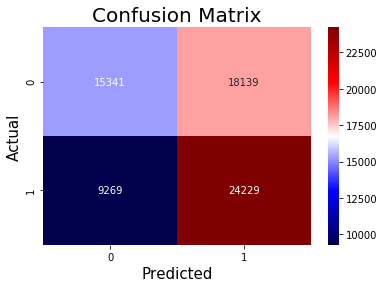

17
Logistic Regression
Accuracy: 0.62 - Balanced accuracy: 0.62 - Geometric mean 0.61


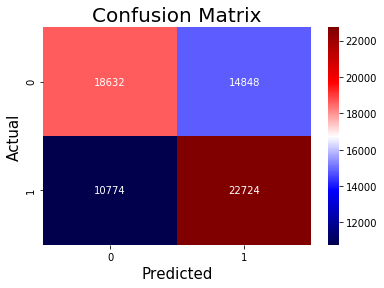

Decision Tree
Accuracy: 0.53 - Balanced accuracy: 0.53 - Geometric mean 0.53


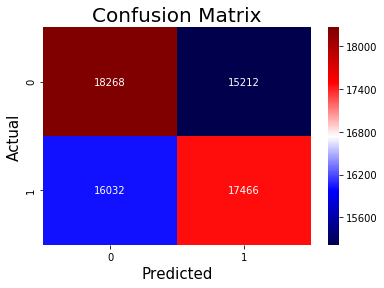

Random Forest
Accuracy: 0.57 - Balanced accuracy: 0.57 - Geometric mean 0.57


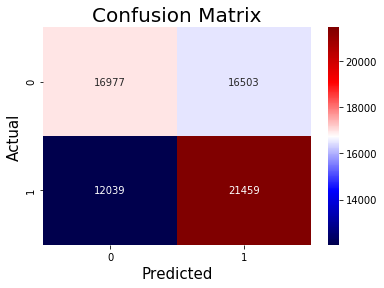

Neural Net
Accuracy: 0.59 - Balanced accuracy: 0.59 - Geometric mean 0.57


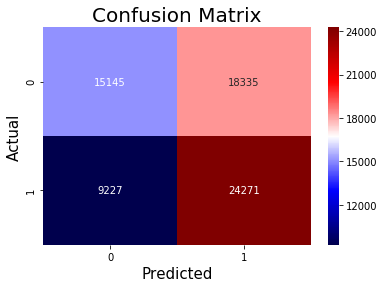

18
Logistic Regression
Accuracy: 0.62 - Balanced accuracy: 0.62 - Geometric mean 0.61


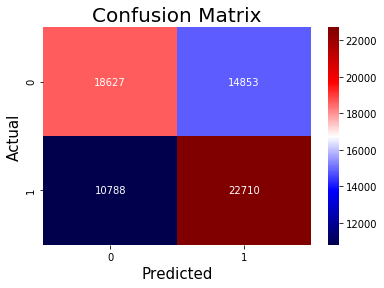

Decision Tree
Accuracy: 0.53 - Balanced accuracy: 0.53 - Geometric mean 0.53


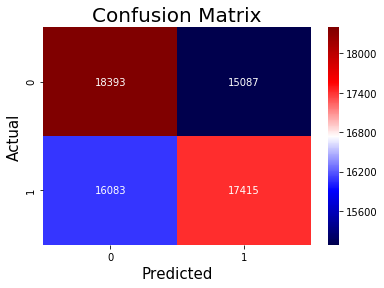

Random Forest
Accuracy: 0.57 - Balanced accuracy: 0.57 - Geometric mean 0.57


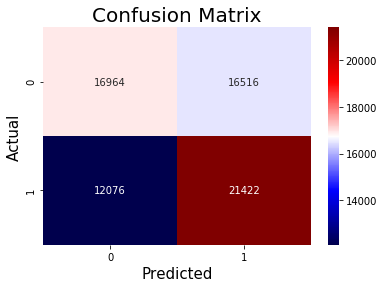

Neural Net
Accuracy: 0.59 - Balanced accuracy: 0.59 - Geometric mean 0.59


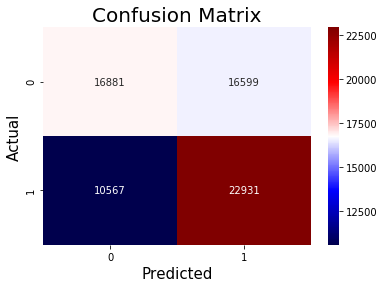

19
Logistic Regression
Accuracy: 0.62 - Balanced accuracy: 0.62 - Geometric mean 0.61


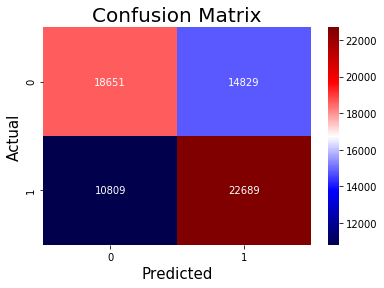

Decision Tree
Accuracy: 0.53 - Balanced accuracy: 0.53 - Geometric mean 0.53


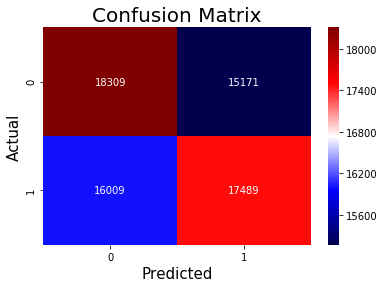

Random Forest
Accuracy: 0.57 - Balanced accuracy: 0.57 - Geometric mean 0.57


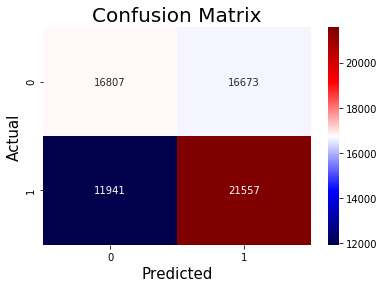

Neural Net
Accuracy: 0.59 - Balanced accuracy: 0.59 - Geometric mean 0.58


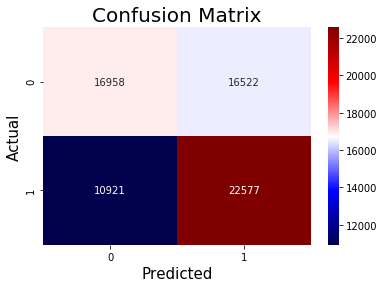

20
Logistic Regression
Accuracy: 0.62 - Balanced accuracy: 0.62 - Geometric mean 0.61


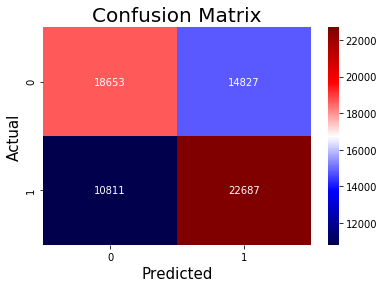

Decision Tree
Accuracy: 0.54 - Balanced accuracy: 0.54 - Geometric mean 0.54


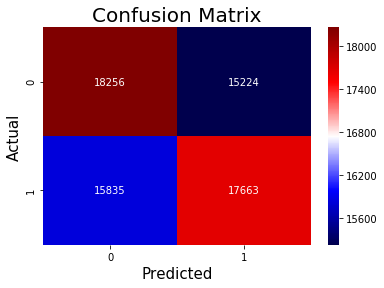

Random Forest
Accuracy: 0.57 - Balanced accuracy: 0.57 - Geometric mean 0.57


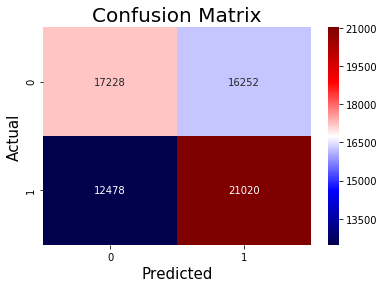

Neural Net
Accuracy: 0.59 - Balanced accuracy: 0.59 - Geometric mean 0.58


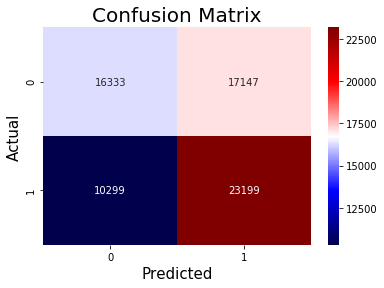

In [42]:
from sklearn.model_selection import train_test_split
df2=df1
X_train1, X_test1, y_train1, y_test1 = train_test_split(X, y, test_size=0.25)

X_train=X_train1
X_test=X_test1
X_train2=X_train
X_test2=X_test
for p in range(0,21):
    print(p)
    lista=feature_selection_df.Feature[0:p+1]
###### AQUI CORREMOS EL MODELO DE CLASIFICACION 
    X_train=X_train2
    X_test=X_test2
    X_train=X_train[lista]
    X_test=X_test[lista]
    #X=X[lista]
    #Hacemos dos listas con nombres y modelos a utilizar, despues de observar la data se ajustaba más a estos 4 classifiers
    from imblearn.metrics import geometric_mean_score
    names = ["Logistic Regression",
         "Decision Tree", "Random Forest", "Neural Net"
        ]
    classifiers = [LogisticRegression(fit_intercept=True),
               DecisionTreeClassifier(),
               RandomForestClassifier( n_estimators=10, max_features=1),
               MLPClassifier(alpha=1, max_iter=50000)
              ]
#los estandarizamos poraue asi funcionan mejor
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.10)
    X_trainStandard = StandardScaler().fit_transform(X_train)
    X_testStandard = StandardScaler().fit_transform(X_test)
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.15)
#X1=safety_df[lista]
#y1=safety_df['Accidentes']
# iterate over classifiers
    for name, clf in zip(names, classifiers):
        clf.fit(X_trainStandard, y_train1)
    #score2 = clf.score(X1, y1)
        print(name)
        rfc_predict = clf.predict(X_testStandard)
    #Se utilizan tres accuracies para tener una vision mas general de lo que esta sucediendo
        print('Accuracy: {:.2f} - Balanced accuracy: {:.2f} - Geometric mean {:.2f}'
          .format(clf.score(X_testStandard, y_test1), balanced_accuracy_score(y_test1, rfc_predict),
              geometric_mean_score(y_test1, rfc_predict)))
        data = {'y_Predicted': rfc_predict,
            'y_Actual':    y_test1
            }

        df = pd.DataFrame(data, columns=['y_Actual','y_Predicted'])
        confusion_matrix = pd.crosstab(df['y_Actual'], df['y_Predicted'], rownames=['Actual'], colnames=['Predicted'])

        ax = sns.heatmap(confusion_matrix, annot=True, cmap="seismic",fmt='g' )
#se grafica una confusion matrix para observar la relacion de verdaderos positivos y falsos negativos 
        plt.title('Confusion Matrix', fontsize = 20) # title with fontsize 20
        plt.xlabel('Predicted', fontsize = 15) # x-axis label with fontsize 15
        plt.ylabel('Actual', fontsize = 15) # y-axis label with fontsize 15

        plt.show()
    ##se guarda en modelo en una carpeta para ser usado en un futuro
        #filename = name+'.sav'
        #pickle.dump(clf, open(filename, 'wb'))
    #print(score2)

In [48]:
lista

1                                 meta
2                     duracion_campaña
3          categoria_principal_Theater
4       categoria_principal_Technology
5            categoria_principal_Music
6       categoria_principal_Journalism
7             categoria_principal_Food
8          categoria_principal_Fashion
9            categoria_principal_Dance
10          categoria_principal_Crafts
11          categoria_principal_Comics
12                              verano
13                           primavera
14                               otono
15                            invierno
16      categoria_principal_Publishing
17     categoria_principal_Photography
18           categoria_principal_Games
19    categoria_principal_Film & Video
20          categoria_principal_Design
Name: Feature, dtype: object

Logistic Regression
Accuracy: 0.62 - Balanced accuracy: 0.62 - Geometric mean 0.62


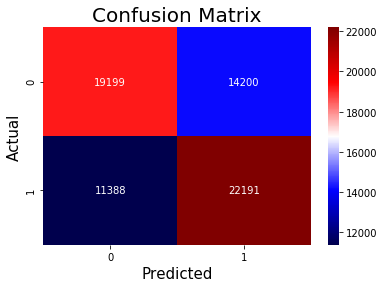

Decision Tree
Accuracy: 0.54 - Balanced accuracy: 0.54 - Geometric mean 0.54


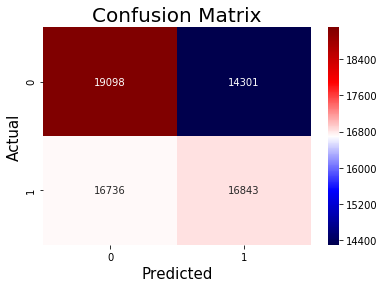

Random Forest
Accuracy: 0.55 - Balanced accuracy: 0.56 - Geometric mean 0.55


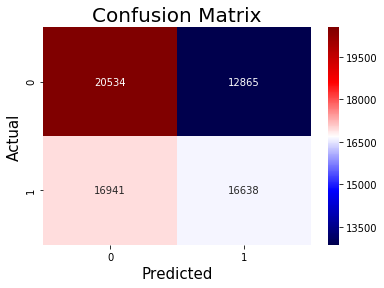

Neural Net
Accuracy: 0.59 - Balanced accuracy: 0.59 - Geometric mean 0.58


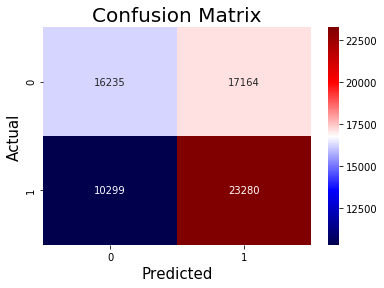

In [57]:
###### AQUI CORREMOS EL MODELO DE CLASIFICACION 
lista=feature_selection_df.Feature[0:20]
X_train=X_train1[lista]
X_test=X_test1[lista]
#X=X[lista]
#Hacemos dos listas con nombres y modelos a utilizar, despues de observar la data se ajustaba más a estos 4 classifiers
from imblearn.metrics import geometric_mean_score
names = ["Logistic Regression",
         "Decision Tree", "Random Forest", "Neural Net"
        ]
classifiers = [LogisticRegression(fit_intercept=True),
               DecisionTreeClassifier(),
               RandomForestClassifier( n_estimators=10, max_features=1),
               MLPClassifier(alpha=1, max_iter=50000)
              ]
#los estandarizamos poraue asi funcionan mejor
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.10)
X_trainStandard = StandardScaler().fit_transform(X_train)
#X_trainStandard = X_train
X_testStandard = StandardScaler().fit_transform(X_test)
#X_testStandard = X_test
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.15)
#X1=safety_df[lista]
#y1=safety_df['Accidentes']
# iterate over classifiers
for name, clf in zip(names, classifiers):
    clf.fit(X_trainStandard, y_train1)
    #score2 = clf.score(X1, y1)
    print(name)
    rfc_predict = clf.predict(X_testStandard)
    #Se utilizan tres accuracies para tener una vision mas general de lo que esta sucediendo
    print('Accuracy: {:.2f} - Balanced accuracy: {:.2f} - Geometric mean {:.2f}'
      .format(clf.score(X_testStandard, y_test1), balanced_accuracy_score(y_test1, rfc_predict),
              geometric_mean_score(y_test1, rfc_predict)))
    data = {'y_Predicted': rfc_predict,
            'y_Actual':    y_test1
            }

    df = pd.DataFrame(data, columns=['y_Actual','y_Predicted'])
    confusion_matrix = pd.crosstab(df['y_Actual'], df['y_Predicted'], rownames=['Actual'], colnames=['Predicted'])

    ax = sns.heatmap(confusion_matrix, annot=True, cmap="seismic",fmt='g' )
#se grafica una confusion matrix para observar la relacion de verdaderos positivos y falsos negativos 
    plt.title('Confusion Matrix', fontsize = 20) # title with fontsize 20
    plt.xlabel('Predicted', fontsize = 15) # x-axis label with fontsize 15
    plt.ylabel('Actual', fontsize = 15) # y-axis label with fontsize 15

    plt.show()
    ##se guarda en modelo en una carpeta para ser usado en un futuro
    filename = name+' IBMBalanced2.sav'
    pickle.dump(clf, open(filename, 'wb'))
    #print(score2)

Accuracy of logistic regression classifier on train set: 0.58
Accuracy of logistic regression classifier on test set: 0.58
              precision    recall  f1-score   support

           0       0.57      0.63      0.60     33399
           1       0.59      0.54      0.56     33579

    accuracy                           0.58     66978
   macro avg       0.58      0.58      0.58     66978
weighted avg       0.58      0.58      0.58     66978



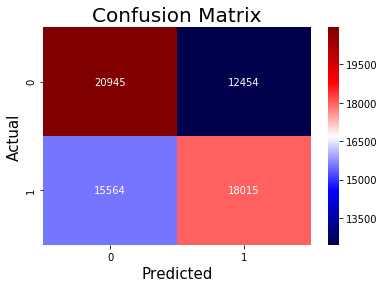

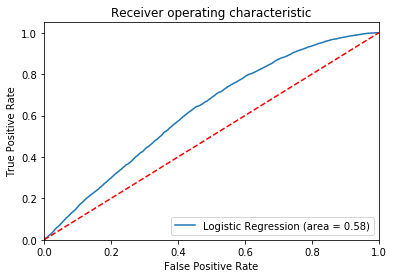

Accuracy: 0.50 - Balanced accuracy: 0.58 - Geometric mean 0.58


In [63]:
#The p-values for most of the variables are smaller than 0.05, except four variables, therefore, we will remove them.
#Implementación del modelo
#loaded_model = pickle.load(open('Logistic Regression IBMBalanced2.sav', 'rb'))
#result = loaded_model.score(X_test1, y_test1)
X_train=X_train1[lista]
X_test=X_test1[lista]
y_train=y_train1
y_test=y_test1
#X=X1[lista]
#y=y1
#print(result.summary())

#Logistic Regression Model Fitting

#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15)
logreg = LogisticRegression(fit_intercept=True,solver='liblinear')
logreg.fit(X_train, y_train)

#Predicting the test set results and calculating the accuracy
y_pred = logreg.predict(X_train)
print('Accuracy of logistic regression classifier on train set: {:.2f}'.format(logreg.score(X_train, y_train)))

#Predicting the test set results and calculating the accuracy
y_pred = logreg.predict(X_test)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg.score(X_test, y_test)))
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

#rfc_predict = clf.predict(X_test)
data = {'y_Predicted': y_pred, 'y_Actual':    y_test}

df = pd.DataFrame(data, columns=['y_Actual','y_Predicted'])
confusion_matrix = pd.crosstab(df['y_Actual'], df['y_Predicted'], rownames=['Actual'], colnames=['Predicted'])

ax = sns.heatmap(confusion_matrix, annot=True, cmap="seismic",fmt='g' )

plt.title('Confusion Matrix', fontsize = 20) # title with fontsize 20
plt.xlabel('Predicted', fontsize = 15) # x-axis label with fontsize 15
plt.ylabel('Actual', fontsize = 15) # y-axis label with fontsize 15

plt.show()

#ROC Curve

logit_roc_auc = roc_auc_score(y_test, logreg.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, logreg.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()
print('Accuracy: {:.2f} - Balanced accuracy: {:.2f} - Geometric mean {:.2f}'
      .format(clf.score(X_test, y_test), balanced_accuracy_score(y_test, y_pred),
              geometric_mean_score(y_test, y_pred)))

Accuracy of logistic regression classifier on train set: 0.78
Accuracy of logistic regression classifier on test set: 0.64
              precision    recall  f1-score   support

           0       0.64      0.65      0.65     26790
           1       0.65      0.64      0.64     26793

    accuracy                           0.64     53583
   macro avg       0.64      0.64      0.64     53583
weighted avg       0.64      0.64      0.64     53583



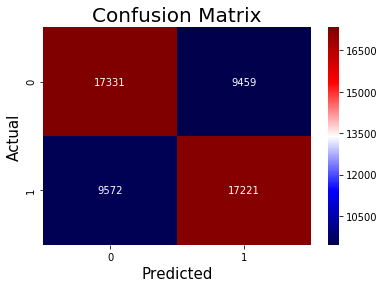

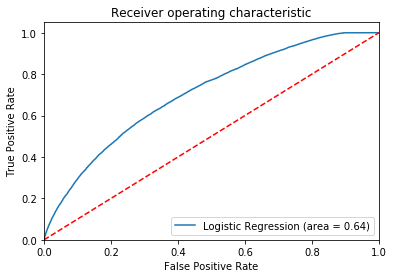

In [86]:
from sklearn.feature_extraction.text import CountVectorizer as cv
from sklearn.feature_extraction.text import TfidfVectorizer as tfid
#x = df1['nombre']
#y = df1['estado'] 
xTrain, xTest, yTrain, yTest = train_test_split(X['nombre'],y,test_size = 0.20)
vectorizer = cv()
xTraincv = vectorizer.fit_transform(xTrain)
xTestcv = vectorizer.transform(xTest)
#logit  = LogisticRegression()
#logit.fit(xTraincv,yTrain)
#logit.score(xTestcv,yTest)
#loaded_model = pickle.load(open('Logistic Regression IBMBalanced2.sav', 'rb'))
#result = logit.score(xTestcv, yTest)
X_train=xTraincv
X_test=xTestcv
y_train=yTrain
y_test=yTest
#X=X1[lista]
#y=y1


#Logistic Regression Model Fitting

#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15)
logreg = LogisticRegression(fit_intercept=True,solver='liblinear')
logreg.fit(X_train, y_train)

#Predicting the test set results and calculating the accuracy
y_pred = logreg.predict(X_train)
print('Accuracy of logistic regression classifier on train set: {:.2f}'.format(logreg.score(X_train, y_train)))

#Predicting the test set results and calculating the accuracy
y_pred = logreg.predict(X_test)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg.score(X_test, y_test)))
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

#rfc_predict = clf.predict(X_test)
data = {'y_Predicted': y_pred, 'y_Actual':    y_test}

df = pd.DataFrame(data, columns=['y_Actual','y_Predicted'])
confusion_matrix = pd.crosstab(df['y_Actual'], df['y_Predicted'], rownames=['Actual'], colnames=['Predicted'])

ax = sns.heatmap(confusion_matrix, annot=True, cmap="seismic",fmt='g' )

plt.title('Confusion Matrix', fontsize = 20) # title with fontsize 20
plt.xlabel('Predicted', fontsize = 15) # x-axis label with fontsize 15
plt.ylabel('Actual', fontsize = 15) # y-axis label with fontsize 15

plt.show()

#ROC Curve

logit_roc_auc = roc_auc_score(y_test, logreg.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, logreg.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

Negativas: 
['canceled' 'app' 'com' 'edm' 'screenplay' 'youtube' 'clothing'
 'application' 'network' 'cannabis' 'events' 'gourmet' 'label' 'promotion'
 'website' 'sports' 'career' 'marketplace' 'und' 'tha']

Positivas: 
['miniatures' 'residency' '5e' 'zine' 'issue' 'presents' 'sxsw' 'cthulhu'
 'raspberry' 'volume' 'premiere' 'thesis' 'nudes' 'titanium' 'anthology'
 'fringe' 'edinburgh' 'lovecraft' 'theatre']

Accuracy of logistic regression classifier on train set: 0.75
Accuracy of logistic regression classifier on test set: 0.65
              precision    recall  f1-score   support

           0       0.65      0.63      0.64     26790
           1       0.64      0.67      0.66     26793

    accuracy                           0.65     53583
   macro avg       0.65      0.65      0.65     53583
weighted avg       0.65      0.65      0.65     53583



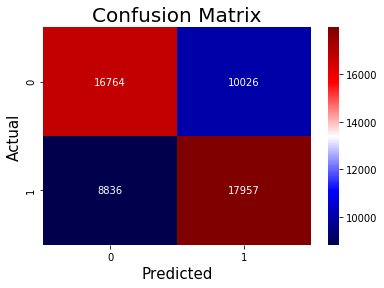

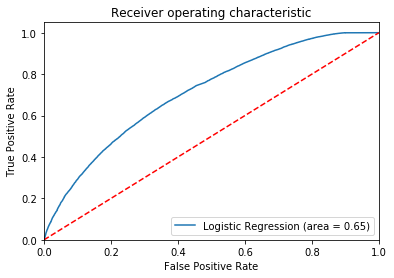

In [87]:
vectorizer = tfid()
xTraintf = vectorizer.fit_transform(xTrain)
xTesttf = vectorizer.transform(xTest)
X_train=xTraintf
X_test=xTesttf
y_train=yTrain
y_test=yTest
#X=X1[lista]
#y=y1
logreg = LogisticRegression(fit_intercept=True,solver='liblinear')
logreg.fit(X_train, y_train)
features = np.array(vectorizer.get_feature_names())
sorted_coef_index = logreg.coef_[0].argsort()
print('Negativas: \n{}\n'.format(features[sorted_coef_index][:20]))
print('Positivas: \n{}\n'.format(features[sorted_coef_index][:-20:-1]))

#Logistic Regression Model Fitting

#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15)


#Predicting the test set results and calculating the accuracy
y_pred = logreg.predict(X_train)
print('Accuracy of logistic regression classifier on train set: {:.2f}'.format(logreg.score(X_train, y_train)))

#Predicting the test set results and calculating the accuracy
y_pred = logreg.predict(X_test)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg.score(X_test, y_test)))
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

#rfc_predict = clf.predict(X_test)
data = {'y_Predicted': y_pred, 'y_Actual':    y_test}

df = pd.DataFrame(data, columns=['y_Actual','y_Predicted'])
confusion_matrix = pd.crosstab(df['y_Actual'], df['y_Predicted'], rownames=['Actual'], colnames=['Predicted'])

ax = sns.heatmap(confusion_matrix, annot=True, cmap="seismic",fmt='g' )

plt.title('Confusion Matrix', fontsize = 20) # title with fontsize 20
plt.xlabel('Predicted', fontsize = 15) # x-axis label with fontsize 15
plt.ylabel('Actual', fontsize = 15) # y-axis label with fontsize 15

plt.show()

#ROC Curve

logit_roc_auc = roc_auc_score(y_test, logreg.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, logreg.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()
filename = name+' SentimentAnalysis.sav'
pickle.dump(logreg, open(filename, 'wb'))
#print(score2)